In [12]:
from yahpo_gym.configuration import config_dict, cfg
from yahpo_gym.benchmark_set import BenchmarkSet
from yahpo_gym import local_config
import matplotlib.pyplot as plt
import pandas as pd
local_config.init_config()
local_config.set_data_path("C:\\Users\\flo\\LRZ Sync+Share\\multifidelity_data")
_lcbench_dict = {
    'config_id' : 'lcbench',
    'y_names' : ['time', 'val_accuracy', 'val_cross_entropy', 'val_balanced_accuracy', 'test_cross_entropy', 'test_balanced_accuracy'],
    'y_minimize' : [True, False, True, False, True, False],
    'cont_names': ['epoch', 'batch_size', 'learning_rate', 'momentum', 'weight_decay', 'num_layers', 'max_units', 'max_dropout'],
    'cat_names': ['OpenML_task_id'],
    'instance_names' : 'OpenML_task_id',
    'fidelity_params': ['epoch'],
    'runtime_name': 'time',
    'model': 'new_model.onnx_noisy',
} 
config_dict.update({'lcbench_noisy' : _lcbench_dict})

In [13]:
bench = BenchmarkSet("lcbench_noisy", download = False)
bench.config_space

Configuration space object:
  Hyperparameters:
    OpenML_task_id, Type: Categorical, Choices: {3945, 7593, 34539, 126025, 126026, 126029, 146212, 167083, 167104, 167149, 167152, 167161, 167168, 167181, 167184, 167185, 167190, 167200, 167201, 168329, 168330, 168331, 168335, 168868, 168908, 168910, 189354, 189862, 189865, 189866, 189873, 189905, 189906, 189908, 189909}, Default: 3945
    batch_size, Type: UniformInteger, Range: [16, 512], Default: 91, on log-scale
    epoch, Type: UniformInteger, Range: [1, 52], Default: 26
    learning_rate, Type: UniformFloat, Range: [0.00010000000000000009, 0.10000000000000002], Default: 0.0031622777, on log-scale
    max_dropout, Type: UniformFloat, Range: [0.0, 1.0], Default: 0.5
    max_units, Type: UniformFloat, Range: [63.99999999999998, 1024.0], Default: 256.0, on log-scale
    momentum, Type: UniformFloat, Range: [0.1, 0.99], Default: 0.545
    num_layers, Type: UniformInteger, Range: [1, 5], Default: 3
    weight_decay, Type: UniformFloat, Ra

In [3]:
df = pd.read_csv(bench.config.get_path("dataset"))

In [14]:
def plot_true_lc(ccc, yid = 1):
    # Subset data to obtain learning curve for config
    config = pd.DataFrame(data = ccc, index = [0])
    config.drop(bench.config.fidelity_params, axis = 1, inplace=True)
    pdf = df.merge(config, on=list(config.columns.values))
    plt.plot(pdf[bench.config.fidelity_params[0]], pdf[bench.config.y_names[1]])

In [40]:
def plot_lc_lcbench(ccc):
    ccc["OpenML_task_id"] = str(ccc["OpenML_task_id"])
    res = []
    for j in range(5):
        out = []
        for i in range(51):
            val = ccc.copy()
            val.update({"epoch" : i+1})
            out.append(bench.objective_function(val)['val_accuracy'])
        res.append(out)
        
    colors = ['red', 'blue','orange', 'purple','green',]
    for i in range(5):
        plt.plot(range(51), res[i], color=colors[i])

def plot_lc_rbv2(ccc):
    ccc["task_id"] = str(ccc["task_id"])
    ccc['repl'] = 1
    res = []
    bench.check - False
    for j in range(5):
        out = []
        for i in range(95):
            val = ccc.copy()
            val.update({"trainsize" : i / 100. + 0.05})
            if j < 0:
                out.append(bench.objective_function(val)[bench.config.y_names[0]])
            else:
                mn = 0
                for k in range(500):
                    mn += bench.objective_function(val)[bench.config.y_names[0]]
                out.append(mn)               
        res.append(out / 100.)
        
    colors = ['red', 'blue','orange', 'purple','green']
    for i in range(5):
        plt.plot([x / 100 + 0.05 for x in range(95)], res[i], color=colors[i])


{'OpenML_task_id': 34539, 'batch_size': 108, 'epoch': 2, 'learning_rate': 0.0018915220320802, 'max_dropout': 0.445054208513452, 'max_units': 234, 'momentum': 0.511567550922115, 'num_layers': 4, 'weight_decay': 0.0222290108361179}


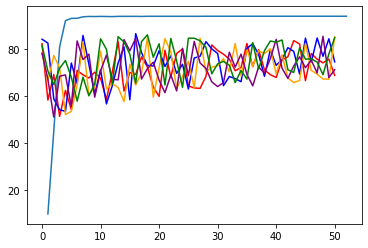

In [41]:
# Draw a sample configuration
ccc = df.sample(1).to_dict()
ccc = {k:list(ccc[k].values())[0] for k in bench.config_space.get_hyperparameter_names()}
print(ccc)
plot_true_lc(ccc)
plot_lc_lcbench(ccc)


In [12]:
bench.config.fidelity_params

['trainsize', 'repl']

In [28]:
ccc = df.sample(1).to_dict()
ccc

{'OpenML_task_id': {1546558: 167201},
 'epoch': {1546558: 27},
 'batch_size': {1546558: 299},
 'learning_rate': {1546558: 0.0048128790304226},
 'momentum': {1546558: 0.322053055745855},
 'weight_decay': {1546558: 0.0970766816997462},
 'num_layers': {1546558: 3},
 'max_units': {1546558: 78},
 'max_dropout': {1546558: 0.751921651342689},
 'time': {1546558: 58.4613008499146},
 'val_accuracy': {1546558: 58.7294158935547},
 'val_cross_entropy': {1546558: 1.0960465669632},
 'val_balanced_accuracy': {1546558: 0.365144670009613},
 'test_cross_entropy': {1546558: 1.09779918193817},
 'test_balanced_accuracy': {1546558: 0.359108239412308}}